In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive/')

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install scipy matplotlib

from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('axes', unicode_minus=False)

# Load Data

In [ ]:
df = pd.read_csv("data/checklist.csv")

In [ ]:
columns_rename = list(df.iloc[3, :].values)[1:]
df = df.iloc[4:, 1:]

new_col = []
for col in columns_rename:
  new_col.append(col.replace(' ', '').replace('\n', ''))
df.columns = new_col

df = df.reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 각 열을 0에서 1로 스케일링
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Hierarchical Clustering

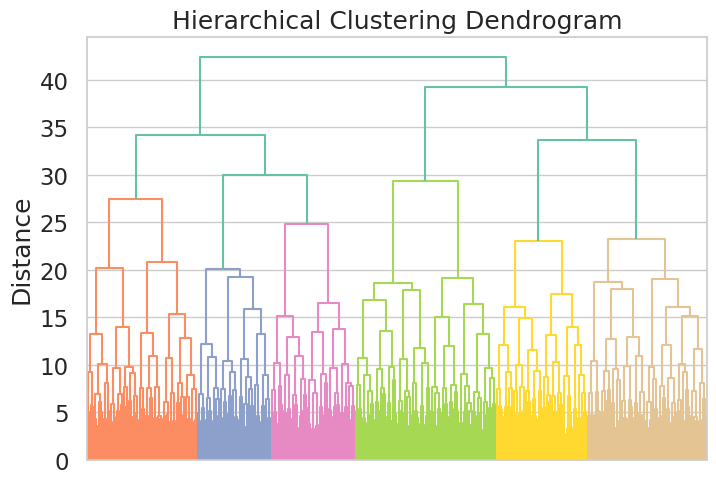

In [ ]:
# 계층적 군집화를 위한 linkage matrix 생성
linkage_matrix = linkage(df, method='ward')  # 'ward'는 계층적 군집화 방법 중 하나

# 시각화를 위한 덴드로그램 생성
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=0, show_leaf_counts=False, no_labels=True)

# 플롯 설정
plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Data Points')
plt.ylabel('Distance')

# 이미지 저장
plt.savefig('dendrogram.png', dpi=300, bbox_inches='tight')

# 덴드로그램 출력
plt.show()

# K-means cluster

In [ ]:
# K-means 활용하여 군집화

min_k = 2
max_k = 15

wss = []
sis = []
for k in range(min_k,max_k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df)
    wss = np.append(wss, kmeans.inertia_)

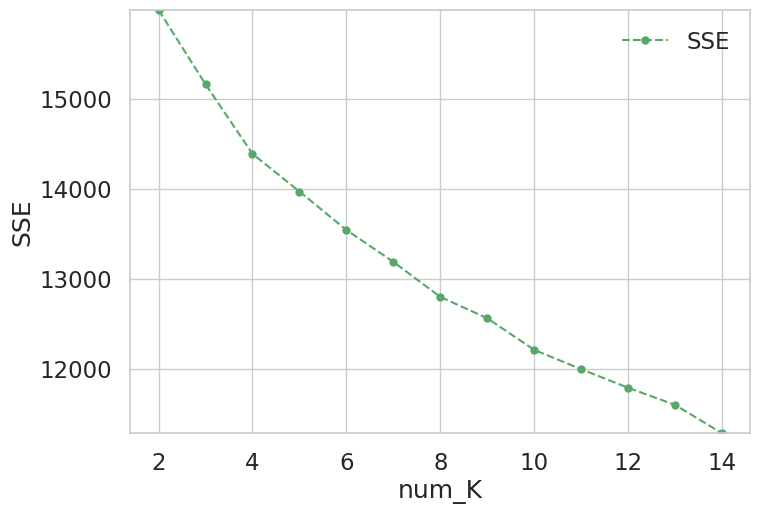

In [ ]:
fig, ax = plt.subplots()
line = ax.plot(np.arange(min_k,max_k), wss, 'go--', label='SSE')
ax.set_ylim(wss.min(), wss.max())
ax.set_xlabel('num_K')
ax.set_ylabel('SSE')
labels = [l.get_label() for l in line]
plt.legend(line, labels)
plt.show()

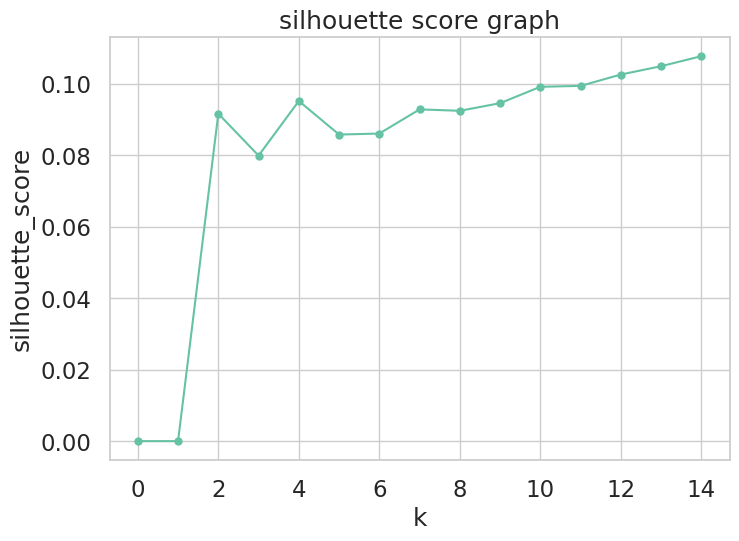

In [ ]:
## 실루엣 점수 계산 그래프 그리기

silhouette_score_collection = np.zeros(15)
for i in range(min_k, max_k) :
    silhouette_kmeans = KMeans(n_clusters= i, n_init=10)
    y_pred = silhouette_kmeans.fit_predict(df)
    silhouette_kmeans.labels_
    silhouette_score_collection[i] = silhouette_score(df, silhouette_kmeans.labels_)

silhouette_score_collection

silhouette_score_graph = pd.DataFrame(silhouette_score_collection)
plt.plot(silhouette_score_graph, marker = 'o')
plt.title("silhouette score graph")
plt.ylabel("silhouette_score")
plt.xlabel("k")
plt.show()

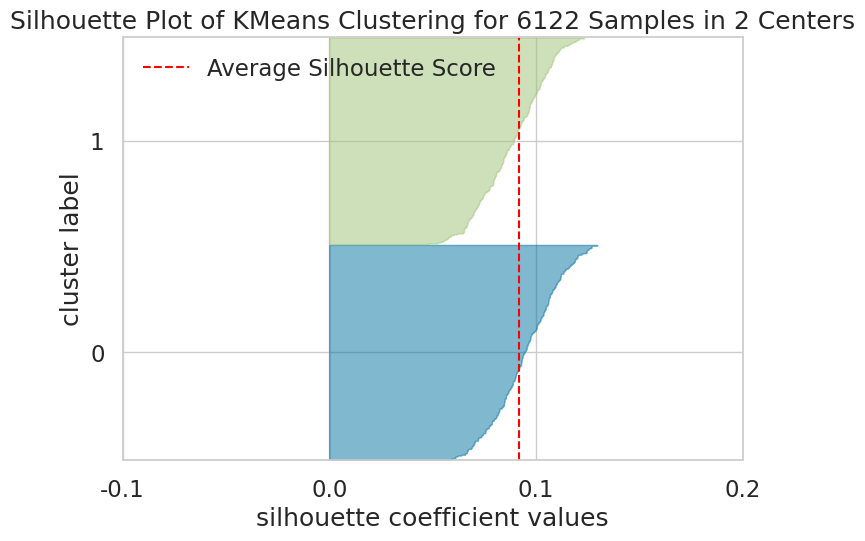

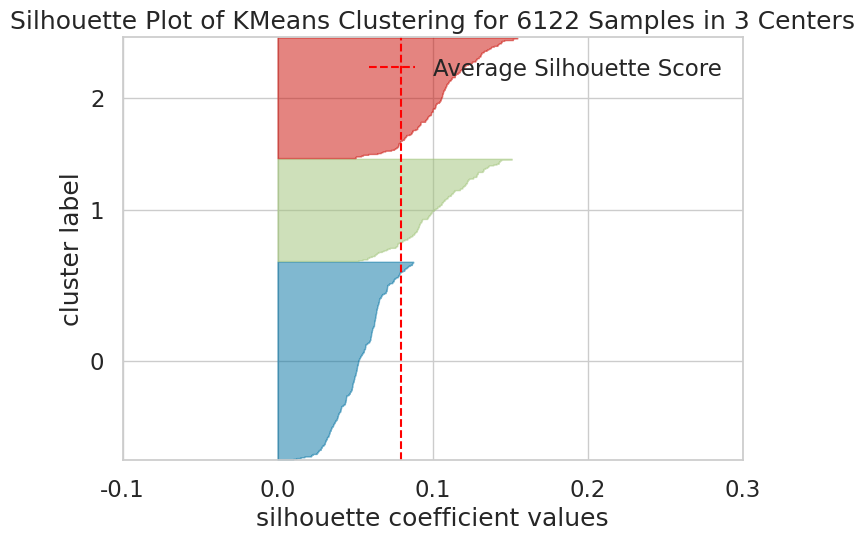

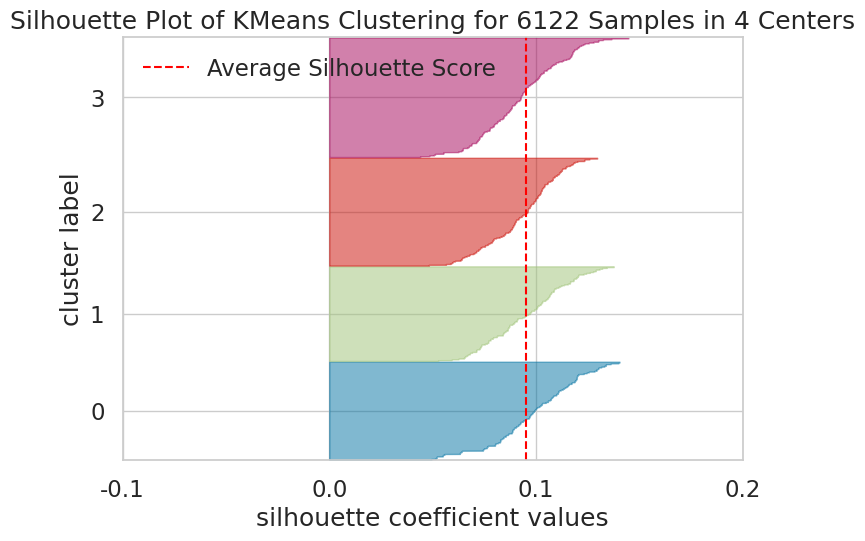

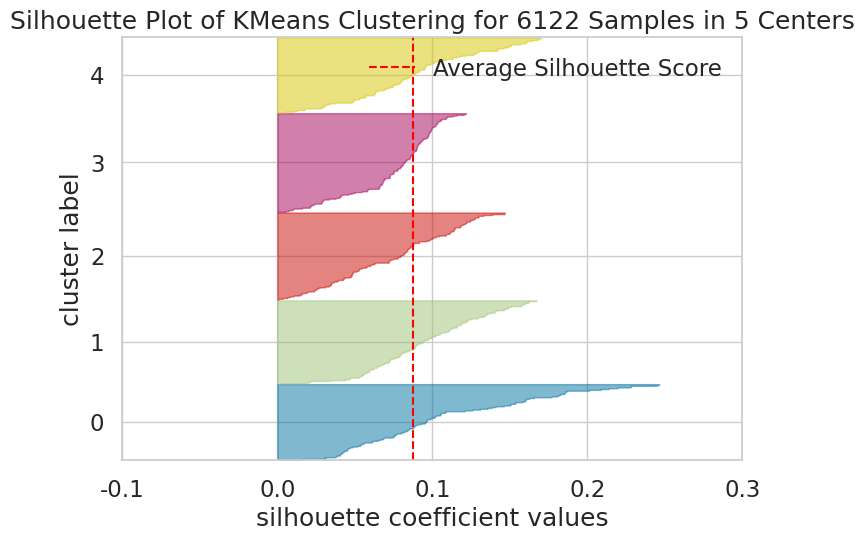

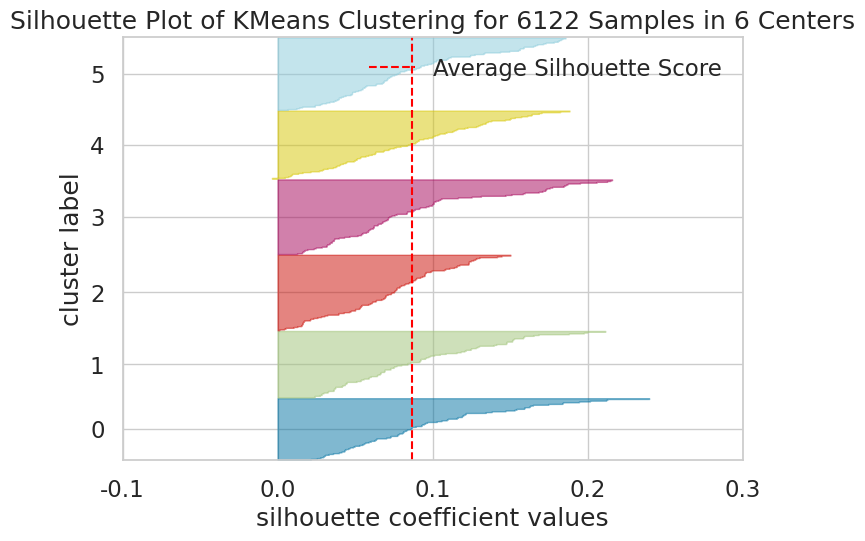

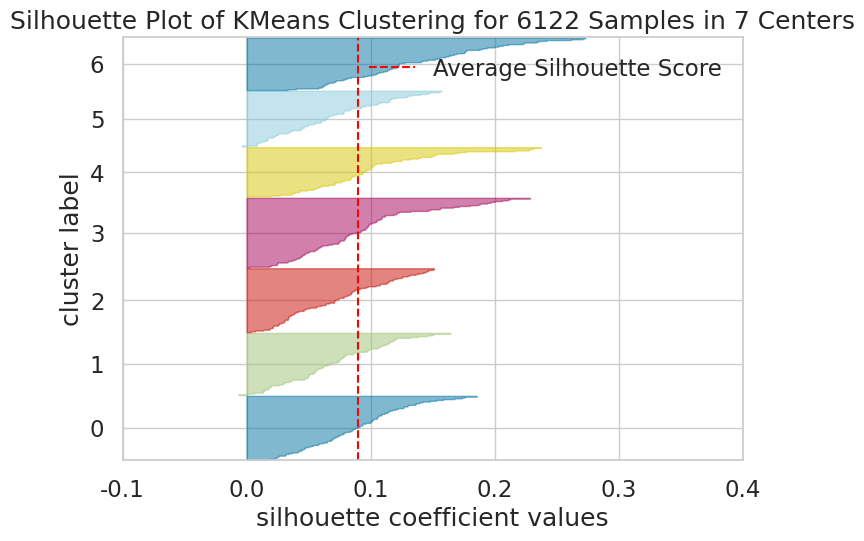

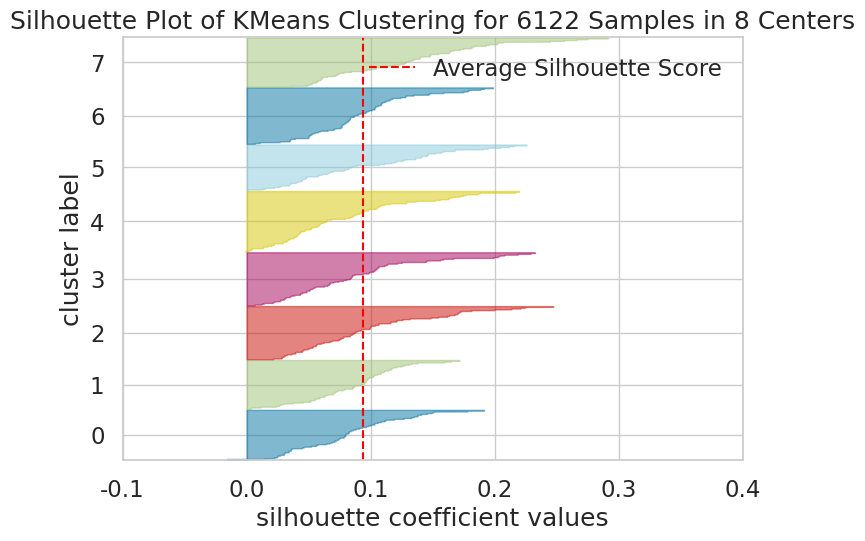

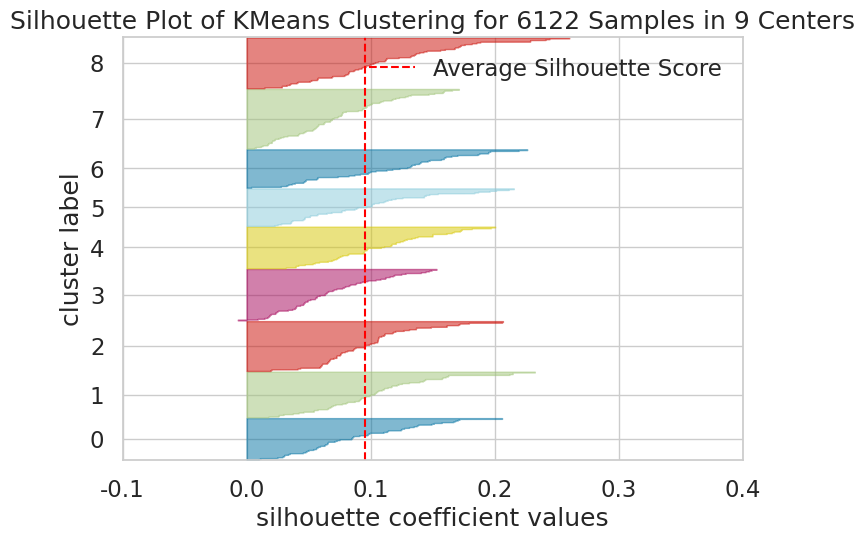

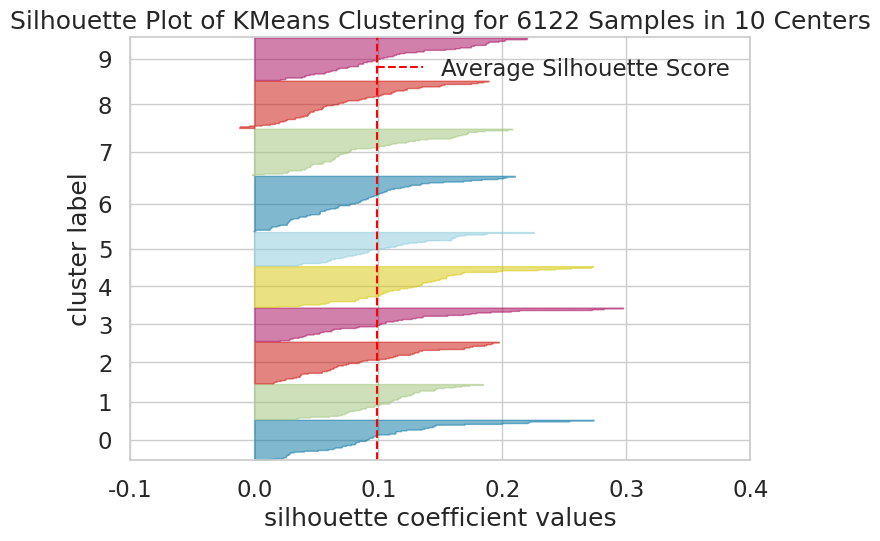

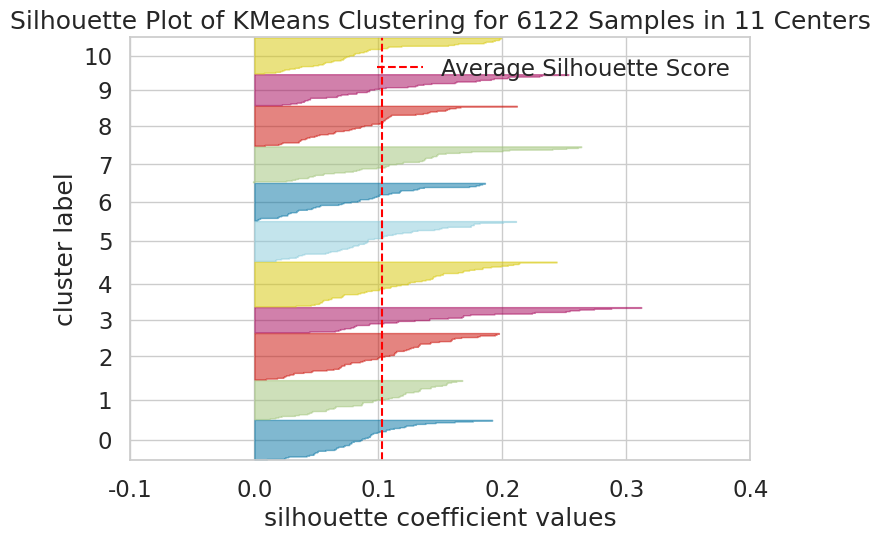

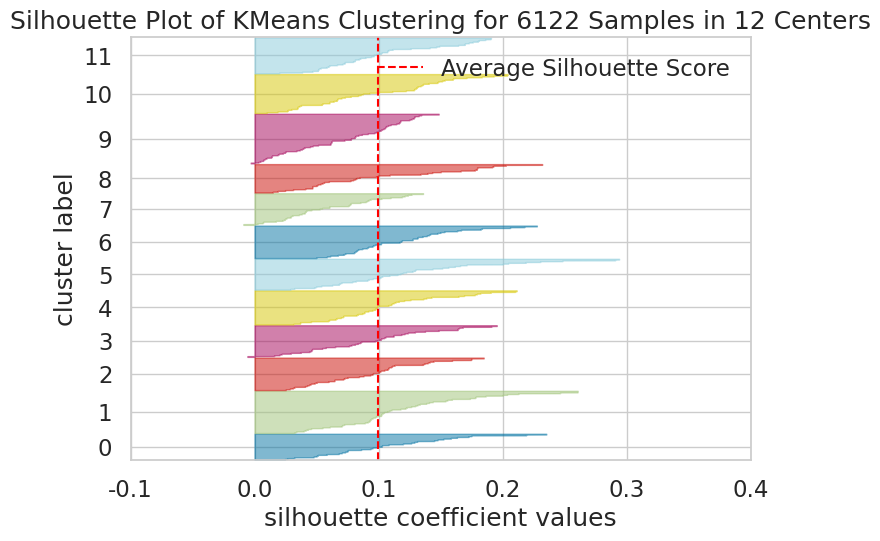

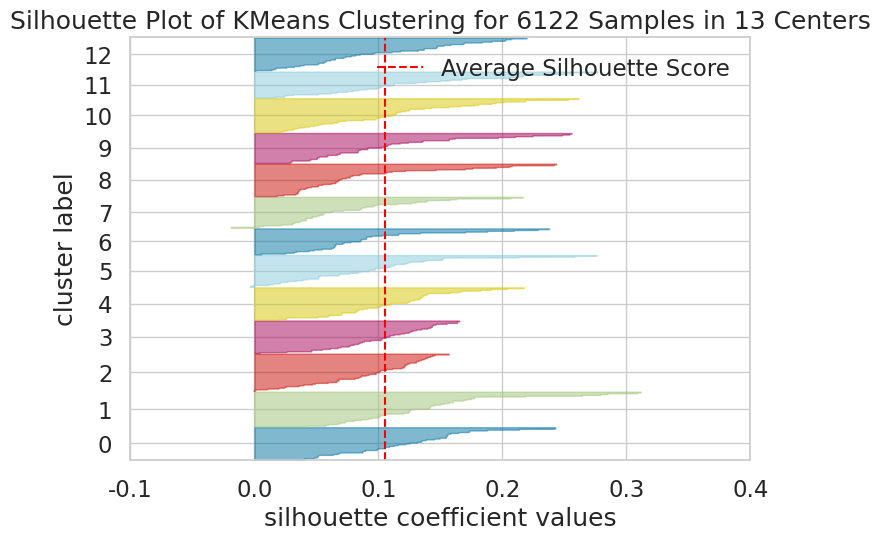

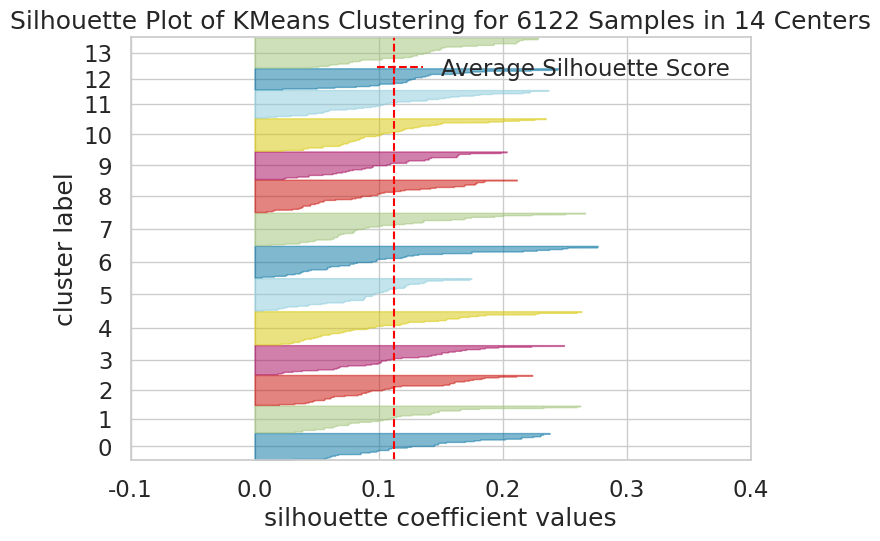

In [ ]:
for i in range(min_k, max_k):
  silhouette_visualizer(KMeans(i, random_state=0, n_init=10), df, colors='yellowbrick')

In [ ]:
best_k = 8

kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=0)

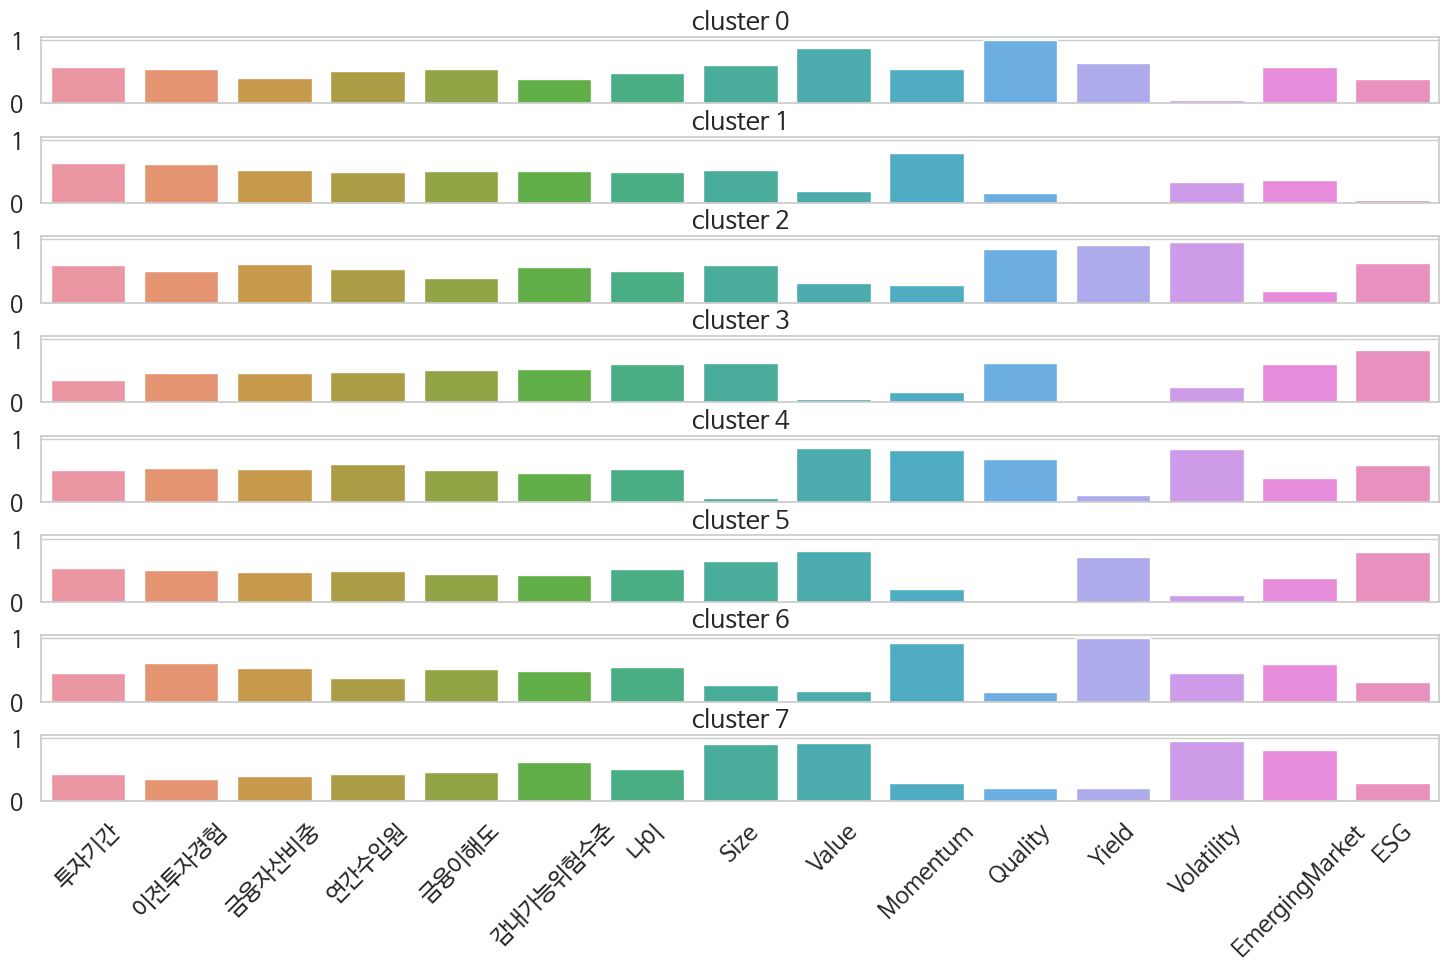

In [ ]:
plt.rc('font', family='NanumBarunGothic')

fig, ax = plt.subplots(best_k, 1, figsize=(15,10), sharex=True, sharey=True)
ax = ax.ravel()
plt.tight_layout()
# plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(hspace=0.5, bottom=0.2)

for i in range(kmeans.n_clusters):
    ax[i].set_title('cluster %d' % i)
    sns.barplot(x=np.arange(df.columns.size), y=kmeans.cluster_centers_[i], ax=ax[i])
    ax[i].set_xticks(np.arange(df.columns.size))
    ax[i].set_xticklabels(df.columns, rotation=45)

plt.savefig('k-means_result.png', dpi=300)

In [ ]:
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Greens', n_colors=10)
plt.rc('axes', unicode_minus=False)

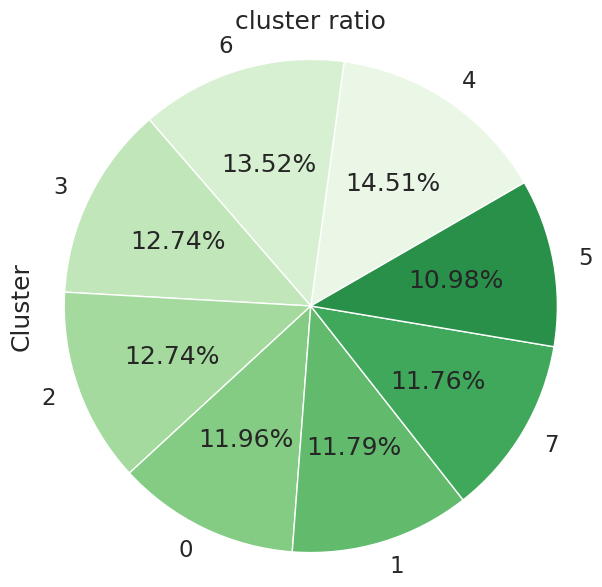

In [ ]:
#각 군집의 비율 확인
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(6,6))
df.Cluster.value_counts().plot.pie(autopct='%.2f%%', figsize=(7,7),
                                startangle=30, legend=False)
plt.title('cluster ratio')
plt.axis('equal')
plt.savefig('pie.png', dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples

score_samples = silhouette_samples(df, df['New'])
print(score_samples.shape)

df['Sil_coef'] = score_samples

average_score = silhouette_score(df, df['New'])
print(average_score)

(6122,)
0.2278731795136182


In [ ]:
# 군집별 점수 확인
df.groupby('New')['Sil_coef'].mean()

New
0    0.228731
1    0.231562
2    0.222385
3    0.212953
4    0.219831
5    0.212936
6    0.212977
7    0.287939
Name: Sil_coef, dtype: float64

In [ ]:
silhouette_score_collection

array([0.        , 0.        , 0.09160934, 0.07988195, 0.09515185,
       0.08576852, 0.0860497 , 0.09281163, 0.09241645, 0.09455425,
       0.09913367, 0.09938721, 0.10256426, 0.10489546, 0.10770621])